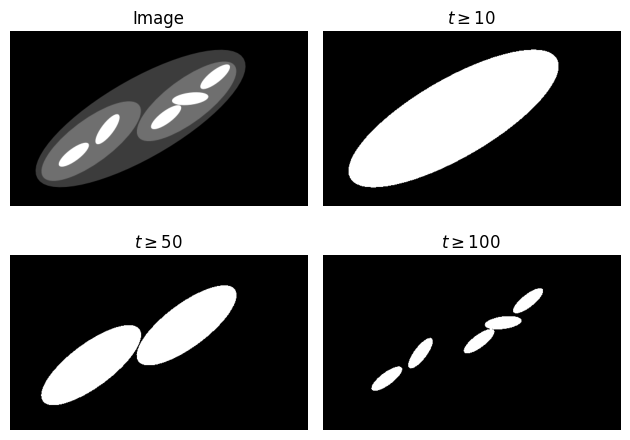

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensity import getAngleMap, getPixelContributions, getBinaryMap
from PIL import Image

# h1 = np.array(Image.open('../../data/img_decouple.png').convert('L'), dtype=np.float64)
h1 = np.array(Image.open('../../data/img_fil.png').convert('L'), dtype=np.float64)

fig, axs = plt.subplots(2, 2, dpi=100)
ax = axs.flatten()
ax[0].imshow(h1, cmap='gray')
ax[0].set_title('Image')

thresholds = [10, 50, 100]

for k, t in enumerate(thresholds):
    ax[k+1].imshow(getBinaryMap(h1, t), cmap='gray')
    ax[k+1].set_title(fr'$t \geq {t}$')

for a in axs.flatten():
    a.axis('off')

fig.tight_layout()
plt.show()

/Users/jaybaptista/Research/tensity/tensity/analysis.py:85: RuntimeWarning: divide by zero encountered in divide
  a1 = (data[:-1, :-1] - threshold) / (data[:-1, :-1] - data[1:, :-1])
/Users/jaybaptista/Research/tensity/tensity/analysis.py:86: RuntimeWarning: divide by zero encountered in divide
  a2 = (data[1:, :-1] - threshold) / (data[1:, :-1] - data[1:, 1:])
/Users/jaybaptista/Research/tensity/tensity/analysis.py:87: RuntimeWarning: divide by zero encountered in divide
  a3 = (data[:-1, 1:] - threshold) / (data[:-1, 1:] - data[1:, 1:])
/Users/jaybaptista/Research/tensity/tensity/analysis.py:88: RuntimeWarning: divide by zero encountered in divide
  a4 = (data[:-1, :-1] - threshold) / (data[:-1, :-1] - data[:-1, 1:])
/Users/jaybaptista/Research/tensity/tensity/analysis.py:122: RuntimeWarning: invalid value encountered in subtract
  dfs[m] = (a2 + 0.5 * (a4 - a2))[m]
/Users/jaybaptista/Research/tensity/tensity/analysis.py:122: RuntimeWarning: invalid value encountered in add
  dfs[m]

Components identified: 1
Components identified: 2
Components identified: 4


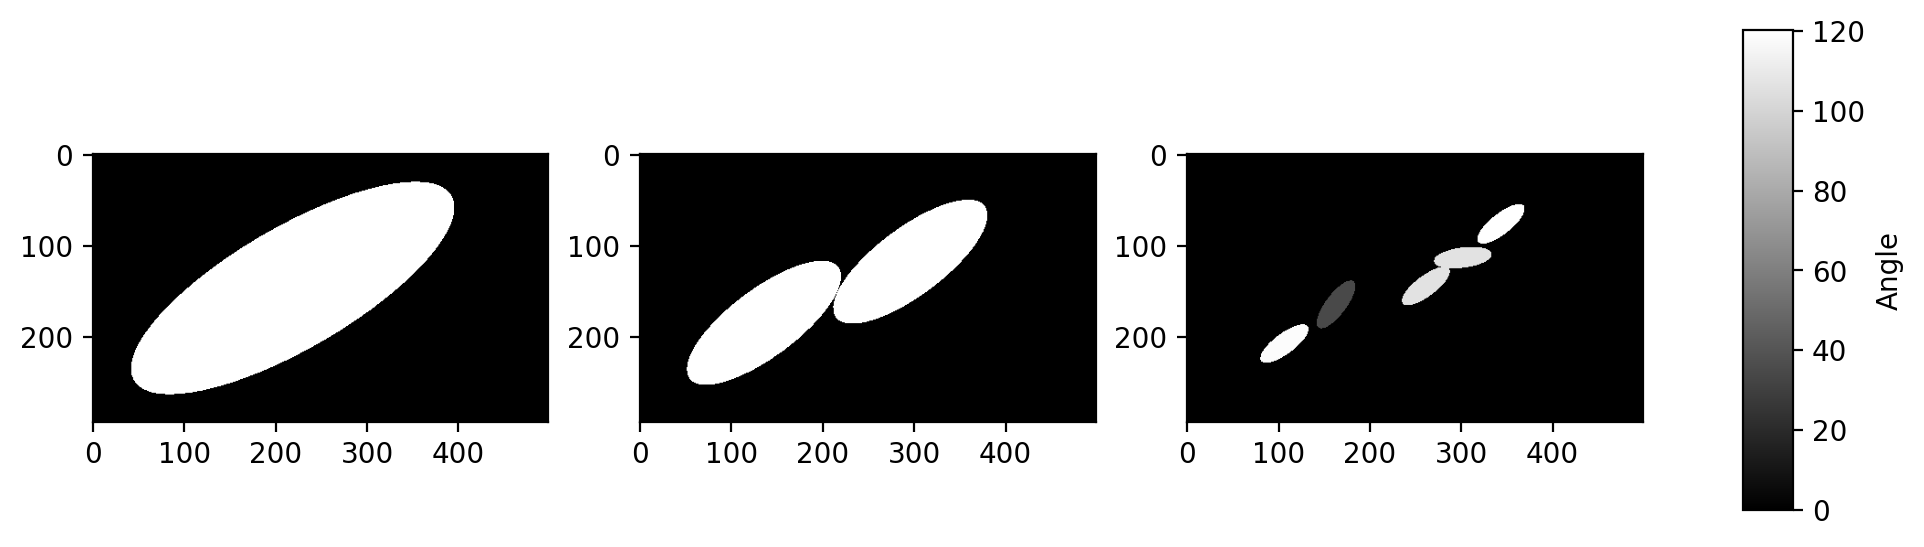

In [2]:
dfs = []
dus = []
W_00s = []
W_01s = []
W_10s = []
W_11s = []

angle_maps = []

for t in thresholds:
    df, du, _, W_00, W_01, W_10, W_11 = getPixelContributions(h1, t)
    
    dfs.append(df)
    dus.append(du)

    W_00s.append(W_00)
    W_01s.append(W_01)
    W_10s.append(W_10)
    W_11s.append(W_11)

    angle_maps.append(getAngleMap(h1, t, W_00, W_01, W_10, W_11))


dfs = np.array(dfs)
dus = np.array(dus)
W_00s = np.array(W_00s)
W_01s = np.array(W_01s)
W_10s = np.array(W_10s)
W_11s = np.array(W_11s)
angle_maps = np.array(angle_maps)

fig, ax = plt.subplots(1, 3, dpi=200, figsize=(10, 3))

f = ax[0].imshow(angle_maps[0] * 180 /np.pi, cmap='gray')
ax[1].imshow(angle_maps[1] * 180 /np.pi, cmap='gray')
ax[2].imshow(angle_maps[2] * 180 /np.pi, cmap='gray')

# put colorbars
cax = fig.add_axes([.95, 0.125, 0.025, .8])
cbar = fig.colorbar(f, cax=cax)
cbar.set_label('Angle')

In [3]:
print(np.sum(dfs, axis=(1,2)))
print([np.sum(getBinaryMap(h1, i)) for i in thresholds])

[41529.01447398 23255.90466353  5243.00355057]
[41440, 23071, 5141]


In [6]:
np.min(dfs)

0.0